In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#This study will examine the highest and lowest temperatures by day for the period of 2005-2014 and find places where the year
#2015 set the record.

In [2]:
data = pd.read_csv('data/C2A2_data/BinnedCsvs_d25/391a2922ad597ba080f4b99dea6d62842562d64845ef5df1a384561e.csv')
data = data.rename(columns = {'Data_Value':'Temperature'})
#Temperatures are given ten times higher of the original value, adjust it.
data['Temperature'] = data['Temperature'] / 10
data.head()

,ID,Date,Element,Temperature
0,CHM00052836,2007-07-09,TMAX,24.6
1,CHM00055578,2015-04-24,TMIN,0.6
2,IN022021900,2011-05-13,TMAX,40.0
3,CHM00055299,2012-05-13,TMIN,0.3
4,CHM00052836,2014-06-12,TMIN,5.2


In [3]:
#Create the 2015 data first.
data2015 = data[data['Date'].str.contains('2015')].dropna()
data2015.sort_values('Date',inplace = True)

data2015 = data2015.groupby('Date')['Temperature'].agg({'TMIN':np.min,'TMAX':np.max})
data2015.reset_index(inplace = True)

data2015['Date'] = data2015['Date'].str[5:]

data2015.head()

,Date,TMIN,TMAX
0,01-01,-28.7,27.1
1,01-02,-21.1,24.6
2,01-03,-22.3,24.8
3,01-04,-6.8,26.0
4,01-05,-21.6,26.9


In [4]:
#Now the whole other dataset.
data['Date'] = data['Date'].str[5:]
data.sort_values('Date', inplace = True)

data = data.groupby('Date')['Temperature'].agg({'TMIN':np.min,'TMAX':np.max})
data.reset_index(inplace = True)

#Since there is no Feb 29 at 2015, we drop that information for our dateset as well.
data = data[data['Date'] != '02-29']

data.head()

,Date,TMIN,TMAX
0,01-01,-28.7,29.4
1,01-02,-28.2,29.5
2,01-03,-30.8,29.5
3,01-04,-28.4,29.3
4,01-05,-28.0,28.0


In [5]:
#In order to make the visualization better, merge the tables to see all values in once.
data_all = data2015.merge(data, on = 'Date', how = 'outer',suffixes = ('_2015','_all'))
data_all.head()

,Date,TMIN_2015,TMAX_2015,TMIN_all,TMAX_all
0,01-01,-28.7,27.1,-28.7,29.4
1,01-02,-21.1,24.6,-28.2,29.5
2,01-03,-22.3,24.8,-30.8,29.5
3,01-04,-6.8,26.0,-28.4,29.3
4,01-05,-21.6,26.9,-28.0,28.0


In [6]:
#Check if there is any missing values.
data_all.isnull().sum()

Date         0
TMIN_2015    0
TMAX_2015    0
TMIN_all     0
TMAX_all     0
dtype: int64

In [7]:
#Create the list of days where temperature high and low records were set in 2015
days_2015_low_record = [x for x in range(0,365) if data_all.loc[x,'TMIN_2015'] == data_all.loc[x,'TMIN_all']]
days_2015_high_record = [x for x in range(0,365) if data_all.loc[x,'TMAX_2015'] == data_all.loc[x,'TMAX_all']]

days_for_plot = [*range(0,365)]

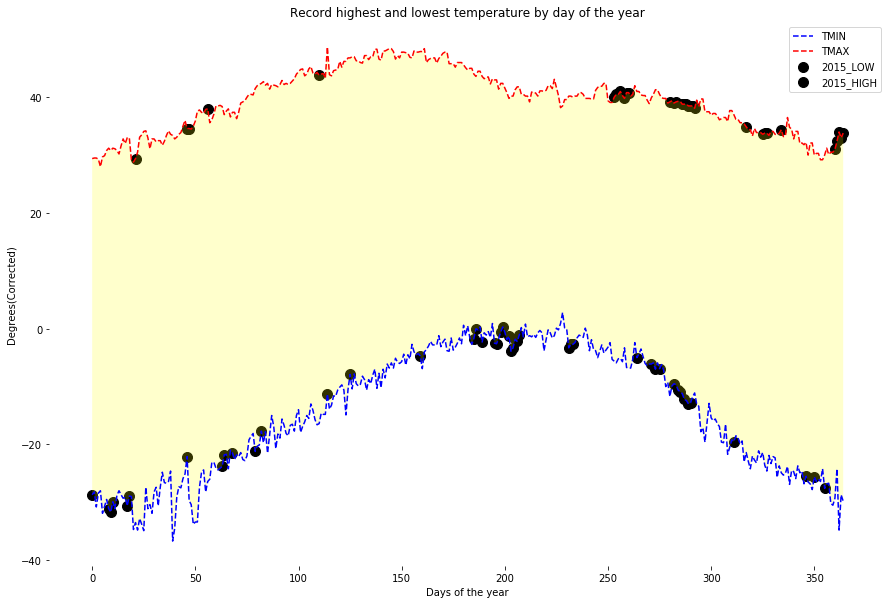

In [8]:
plt.figure(figsize = (15,10))
ax = plt.gca()

plt.plot(days_for_plot,data_all['TMIN_all'],linestyle = '--',c = 'b')
plt.plot(days_for_plot,data_all['TMAX_all'],linestyle = '--',c='r')

plt.scatter(days_2015_low_record, data_all.loc[days_2015_low_record,'TMIN_2015'], c='black',marker = 'o',s = 100)
plt.scatter(days_2015_high_record, data_all.loc[days_2015_high_record,'TMAX_2015'], c='black',marker = 'o',s=100)

ax.set(xlabel = 'Days of the year',
       ylabel = 'Degrees(Corrected)',
       title = 'Record highest and lowest temperature by day of the year')

ax.legend(['TMIN','TMAX','2015_LOW','2015_HIGH'])

ax.fill_between(days_for_plot,data_all['TMAX_all'],data_all['TMIN_all'], alpha = 0.2, facecolor = 'yellow')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)